In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
# sns.set_context("poster")
sns.set_context("talk")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
# np.random.seed(123)

To classify these metrics, one can think of two types of predictions.

- **Soft labels (soft predictions)** = classifier scores like probabilities, for example.
- **Hard labels (hard predictions)**
    - label = $arg \max_i f_i(x)$
    - label = $[f(x) > threshold]$

## a. Accuracy

$$
Accuracy = \frac{1}{N} \sum\limits_{i=1}^{N} [\alpha = y_i]
$$

- The most straightforward.
- It measures how frequently the class prediction is correct.

#### Optimal constant = The most frequent class or label

Because of that optimal, there's a caveat when using this metric. It cares only about **hard predictions**.

#### Example

In [2]:
from sklearn.metrics import accuracy_score
y = np.array([0, 0, 1, 1, 2])
## It cannot handle soft predictions
# scores = np.array([0.0, 0.5, 0.4, 0.7, 0.7])
scores = np.array([1, 0, 1, 1, 2])
accuracy_score(y, scores)

0.8

## b. Logarithmic loss = Logistic loss (logloss)

### Multiclass

$$
logloss = -\frac{1}{N} \sum\limits_{i=1}^{N} \sum\limits_{j=1}^{M} y_{i,j} \log(p_{i,j})
$$

where $N$ is the number of sample or instance and $M$ is the number of possible labels.

$y_{ij}$ is a binary indicator of whether or not label $j$ is the correct classification for instance $i$. $p_{ij}$ is the probability of assigning label $j$ to instance $i$.

### Binary

It is commons to this this for only $M=2$ classes

$$
logloss = - \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})]
$$

### In practice

In practice, to avoid precision problems, one has to avoid predictions to be not from $0$ to $1$ but from $10^{-15}$ to $1$

$$
logloss = -\frac{1}{N} \sum\limits_{i=1}^{N} \sum\limits_{j=1}^{M} y_{i,j} \log(\min(\max(p_{i,j}, 10^{-15}), 1 - 10^{-15}))
$$

- This works with soft predictions, so the classifier must yield the probability for each class rather than just the most likely one.
- A perfect classifier would have a Log Loss of 0.
- It penalizes completely wrong answers.

#### Optimal constant

$$
logloss = - \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, \alpha_1 + (1 - y_{i}) \log \, (1 - \alpha_2)]
$$

The best constant is to make $\alpha_i$ be the frequency (between 0 and 1) of the i-th class

#### Example

In [3]:
from sklearn.metrics import log_loss
y = np.array([0, 0, 1, 1, 1])
scores = np.array([0.0, 0.1, 0.9, 0.7, 0.7])
log_loss(y, scores)

0.1848141838386237

## c. Area Under the Curve (AUC)

Have you ever heard of AUC, ROC, or TPR? These terms are related and are commonly used in classification.

AUC is the area under the ROC curve.

### Receiving Operating Characteristic (ROC) Curve

It's a visual way of inspecting the performance of only **binary classifiers (0/1)**.

### What does it measure?

Comparing the rate at which the classifier makes **True Positives (TP)** and the rate at which it makes **False Positives (FP)**.

I always remember what they mean by remembering that the model's outcome is Positive or Negative. So FP is when the model outputs Positive but this result is False or Incorrect.

- Only for binary tasks
- It has several explanations:
    - AUC (using fpr and tpr, it is calculated using the trapezoidal rule in scikit learn)
    - Pair ordering
        - $AUC = \frac{\text{# correctly ordered pairs}}{\text{total number of pairs}}$  

![TABLE](https://raw.githubusercontent.com/nielshanson/confusion_matrix/master/confusion_present/assets/img/confusion_table.png)

#### Example

In [4]:
from sklearn import metrics
y = np.array([1, 0, 0, 1, 1])
scores = np.array([0.4, 0.5, 0.0, 0.7, 0.7])
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
print(fpr)
print(tpr)
print(thresholds)

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

[0.  0.5 0.5 1. ]
[0.66666667 0.66666667 1.         1.        ]
[0.7 0.5 0.4 0. ]
0.8333333333333333


How FPR and TPR are calculated and the meaning of that threshold are explained in this video https://www.youtube.com/watch?v=OAl6eAyP-yo  
It eassentially computer FPR and TPR for different values of a threshold that will classify the samples.

#### TPR = rate at which you can correctly predict something

    TPR = TP / (TP + FN)

#### FPR = rate at which you predict something that doesn't happen. 

    FPR = FP / (FP + TN)

The point is to measure the trade off between these two.

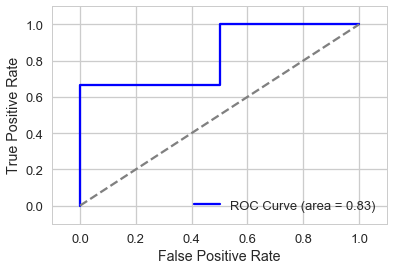

In [5]:
# Because it starts from 0,0
fpr = np.insert(fpr,0,0)
tpr = np.insert(tpr,0,0)

plt.plot(fpr, tpr, 'b', label='ROC Curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'--',c='gray')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Examples of ROC curves

![rocs](images/rocs.png)
        
#### Optimal constant 
- Random predictions lead to AUC = 0.5 (the baseline)
- Any constant will lead to the same AUC value

## d. Cohen's Kappa ($\kappa$)

- It does the same as R-squared for MSE.


From the definition of Cohen's Kappa we have:

$$
\kappa = {\frac {p_{o}-p_{e}}{1-p_{e}}}=1-{\frac {1-p_{o}}{1-p_{e}}}
$$

It is rewriten as

$$
\kappa = 1-{\frac {\text{error}}{\text{baseline error}}} = 1-{\frac {1-\text{accuracy}}{1-p_{e}}}
$$

$p_{e}$ is the "expected agreement" but here it is known as the baseline accuracy that will be **the accuracy that would be on average if we randomly permute our predictions.**

But, in practice, this score is computed analytically (maybe because permuting makes no sense).

For example, when classifying 10 cats and 90 dogs, we can have empirical frequencies: Predict 20 cats and 80 dogs. Then

$$p_e = 0.2*0.1 + 0.8*0.9 = 0.74$$

## e. Weighted kappa

#### Weighted error

It can be necessary to give some predictions more importance because, for example, when predicting cats, dogs and tigers, we can penalize the misclassification tigers by adding **weight**.

So to calculate the weighted error, we need a weight matrix $W$ and the confusion matrix $C$

![](images/weighted_error.png)

Then

$$
\text{Weighted error} = \frac{1}{const} \sum_{i,j} C_{ij} W_{ij}
$$

#### Weighted kappa

$$
\text{Weighted kappa} = 1-{\frac {\text{weighted error}}{\text{weighted baseline error}}}
$$

#### Other types of weighted matrices

Weights can be defined this way for ordinal data.  
The quadractic weighted kappa has been used in many competitions.

![](images/weight_definitions.png)

